In [0]:
#import libraries
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score

In [6]:
#Third Dataset: MAGIC Gamma Telescope - large size
telescope = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data',header=None)
print(telescope.head())
print(telescope.shape)

         0         1       2       3       4         5        6        7   \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110  -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238  -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580 -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633  -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525  21.8393   

        8         9  10  
0  40.0920   81.8828  g  
1   6.3609  205.2610  g  
2  76.9600  256.7880  g  
3  10.4490  116.7370  g  
4   4.6480  356.4620  g  
(19020, 11)


In [0]:
y=[]
for i in telescope[10]:
    if i=='g':
        i=1
        y.append(i)
    elif i=='h':
        i=2
        y.append(i)
telescope=telescope.copy()
del telescope[10]
X=telescope

In [8]:
print('class 1: ',y.count(1))
print('class 2: ',y.count(2))

class 1:  12332
class 2:  6688


In [0]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100) # 70% training and 30% test

In [10]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

import time

start_rf = time.clock()

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets y_cancer_pred=clf_cancer.predict(X_cancer_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

end_rf=time.clock()

print("-----Random Forest, without distillation-------")
print("running time: ",end_rf - start_rf)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Model Accuracy, without distillation
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

#CV Score, without distillation
print('cv_score: ',cross_val_score(clf, X_train, y_train, cv=5).mean())

-----Random Forest, without distillation-------
running time:  49.492001
Accuracy:  0.8825797406239047
cv_score:  0.8790745854795443


In [11]:
#probability
pro=clf.predict_proba(X)
pro

array([[0.936, 0.064],
       [0.614, 0.386],
       [0.611, 0.389],
       ...,
       [0.065, 0.935],
       [0.003, 0.997],
       [0.001, 0.999]])

In [12]:
hist=np.histogram(pro, bins=10)
hist

(array([12756,  3247,  1667,   885,   463,   467,   900,  1631,  3232,
        12792]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

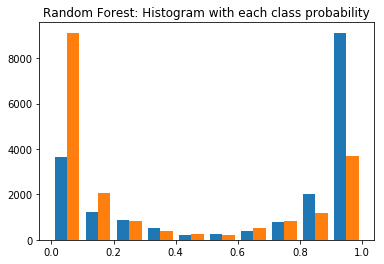

In [13]:
plt.hist(pro, bins=10)  # arguments are passed to np.histogram
plt.title("Random Forest: Histogram with each class probability")
plt.show()

In [0]:
#probability of class 1
pro_1=[]
for i in pro:
    pro_1.append(i[0])

In [15]:
hist_1=np.histogram(pro_1, bins =[0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])
hist_1

(array([3660, 1205,  849,  519,  217,  245,  379,  795, 2032, 9119]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

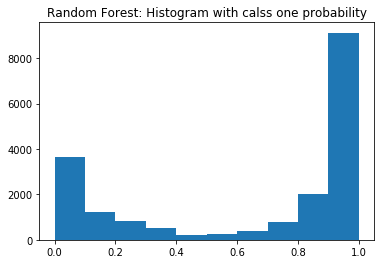

In [16]:
plt.hist(pro_1, bins=[0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])
plt.title("Random Forest: Histogram with calss one probability")
plt.show()

In [18]:
#calculate the number of class1 and class2 after binning
class_1=0
for i in pro_1:
  if i>0.5:
    class_1=class_1+1

print("---class distribution after random forest disllation---")
print('class 1: ',class_1)
class_2=len(pro_1)-class_1
print('class_2: ',class_2)

---class distribution after random forest disllation---
class 1:  12568
class_2:  6452


In [19]:
#new dataset
new_y=[]
new_X=X
for i in pro:
    for j in range(11): 
        if not j==10:
            if j==0: # 0 and 1 exist
                if i[0]>=hist_1[1][j] and i[0]<=hist_1[1][j+1]: #i[0]=class 1 pro  hist[1]_1=class 1 bin edge
                    class_value=j+1
                    new_y.append(class_value)
            else:
                if i[0]>hist_1[1][j] and i[0]<=hist_1[1][j+1]: #i[0]=class 1 pro  hist[1]_1=class 1 bin edge
                    class_value=j+1  
                    #print(class_value)
                    new_y.append(class_value)
new_y=np.array(new_y)
new_y

array([10,  7,  7, ...,  1,  1,  1])

In [20]:
print(new_X.shape)
print(new_y.shape)

(19020, 10)
(19020,)


In [22]:
#Decision Tree with distillation
#split data into 70% training and 30% testing set
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split( new_X, new_y, test_size = 0.3, random_state = 100)

#Import Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

start_dt = time.clock()

clf_dt=DecisionTreeClassifier()
clf_dt.fit(X_new_train, y_new_train)
y_new_pred = clf_dt.predict(X_new_test)
#y_new_pred

end_dt=time.clock()

print('----Descision Tree, with distillation------')
print("time: ",end_dt-start_dt)
print("Accuracy: ", metrics.accuracy_score(y_new_test,y_new_pred))

#CV Score, with distillation
#score=cross_val_score(clf_dt, X_new_train, y_new_train, cv=5)
print('cv_score: ',cross_val_score(clf_dt, X_new_train, y_new_train, cv=5).mean())

----Descision Tree, with distillation------
time:  0.279783000000009
Accuracy:  0.5150718541885735
cv_score:  0.7037666042443212


In [23]:
#pruning parameters with GridSearch
from sklearn.model_selection import GridSearchCV #Import GridSearchCV
#Decision Tree

#pruning with Grid search CV
# Define the grid of hyperparameters 'params_dt'
params_dt = {
'max_depth': [ 1,3,5,7,9,20],
'min_samples_split': [2,3, 4, 5],
'min_impurity_decrease': [0.01 , 0.012,0.004 , 0.008],
'min_samples_leaf':[2,5,6,8,10]
}

# Instantiate a 5-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=clf_dt,
                       param_grid=params_dt,
                       scoring='accuracy',
                       cv=5,
                       n_jobs=-1)
# Fit 'grid_dt' to the training data
grid_dt.fit(X_new_train, y_new_train)
#Extracting the best hyperparameters
#Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_
print('----Descision Tree, with distillation, with pruning------')
print('Best hyerparameters: ', best_hyperparams)
# Extract best CV score from 'grid_dt'
best_CV_score = grid_dt.best_score_
print('Best CV accuracy: ',format(best_CV_score))
#Extracting the best estimator
#Extract best model from 'grid_dt'
best_model = grid_dt.best_estimator_
#Evaluate test set accuracy
test_acc = best_model.score(X_new_test,y_new_test)
#Print test set accuracy
print("Accuracy of best model: ",format(test_acc))

----Descision Tree, with distillation, with pruning------
Best hyerparameters:  {'max_depth': 5, 'min_impurity_decrease': 0.004, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best CV accuracy:  0.704671774072405
Accuracy of best model:  0.5


In [24]:
#Decision Tree without the distillation 
start_dt_no_distill = time.clock()

clf_dt_no_distil=DecisionTreeClassifier()
clf_dt_no_distil.fit(X_train,y_train)
y_pred_no_distil=clf_dt_no_distil.predict(X_test)

end_dt_no_distill = time.clock()

print('-------Decision Tree, without distillation--------')
print('time: ', end_dt_no_distill-start_dt_no_distill)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred_no_distil))
#CV Score
#score=cross_val_score(clf_dt_no_distil, X_train, y_train, cv=5)
print('cv_score: ',cross_val_score(clf_dt_no_distil, X_train, y_train, cv=5).mean())

-------Decision Tree, without distillation--------
time:  0.26998599999998873
Accuracy:  0.8152821591307395
cv_score:  0.8126039826453049


In [25]:
#Suppoort Vector Machine (SVM) Classification
#Import svm model
from sklearn import svm
#Generating model
#create a linear svm classifer 
clf_svm_lr=svm.SVC(kernel='rbf',probability=True) #Linear Kernel
#Train the model using the training sets
clf_svm_lr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [26]:
#probability
pro_svm=clf_svm_lr.predict_proba(X)
pro_svm

array([[0.92561697, 0.07438303],
       [0.64490247, 0.35509753],
       [0.92550191, 0.07449809],
       ...,
       [0.6447336 , 0.3552664 ],
       [0.05303645, 0.94696355],
       [0.05303645, 0.94696355]])

In [27]:
hist_svm=np.histogram(pro_svm, bins=[0. ,0.06,0.1, 0.4, 0.6,0.65, 0.7,0.75, 0.8,0.92, 1. ])
hist_svm

(array([ 4696,  8635,  5659,    60,  5197,   285,    69,    36,    90,
        13313]),
 array([0.  , 0.06, 0.1 , 0.4 , 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.92, 1.  ]))

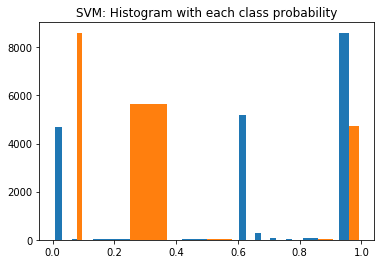

In [28]:
plt.hist(pro_svm, bins=[0. ,0.06,0.1, 0.4, 0.6,0.65, 0.7,0.75, 0.8,0.92, 1. ])  # arguments are passed to np.histogram
plt.title("SVM: Histogram with each class probability")
plt.show()

In [0]:
#probability of class 1
pro_svm_1=[]
for i in pro_svm:
    pro_svm_1.append(i[0])

In [30]:
hist_svm_1=np.histogram(pro_svm_1, bins =[0. ,0.06,0.1, 0.4, 0.6,0.65, 0.7,0.75, 0.8,0.92, 1. ])
hist_svm_1

(array([4695,   33,   33,   30, 5195,  278,   64,   32,   68, 8592]),
 array([0.  , 0.06, 0.1 , 0.4 , 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.92, 1.  ]))

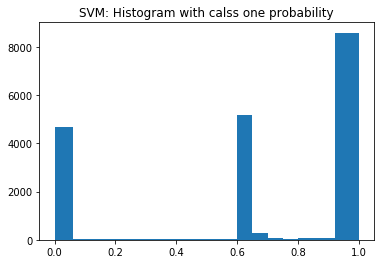

In [31]:
plt.hist(pro_svm_1, bins=[0. ,0.06,0.1, 0.4, 0.6,0.65, 0.7,0.75, 0.8,0.92, 1. ])
plt.title("SVM: Histogram with calss one probability")
plt.show()

In [32]:
#calculate the number of class1 and class2 after binning
class_svm_1=0
for i in pro_svm_1:
  if i>0.5:
    class_svm_1=class_svm_1+1

print("---class distribution after SVM disllation---")
print('class 1: ',class_svm_1)
class_svm_2=len(pro_svm_1)-class_svm_1
print('class_2: ',class_svm_2)

---class distribution after SVM disllation---
class 1:  14252
class_2:  4768


In [33]:
#new dataset
new_svm_y=[]
new_svm_X=X
for i in pro_svm:
    for j in range(11): 
        if not j==10:
            if i[0]>hist_svm_1[1][j] and i[0]<=hist_svm_1[1][j+1]: #i[0]=class 1 pro  hist[1]_1=class 1 bin edge
                class_svm_value=j+1  
                #print(class_value)
                new_svm_y.append(class_svm_value)
new_svm_y=np.array(new_y)
new_svm_y

array([10,  7,  7, ...,  1,  1,  1])

In [34]:
print(new_svm_X.shape)
print(new_svm_y.shape)

(19020, 10)
(19020,)


In [35]:
#Decision Tree, Suppoort Vector Machine (SVM) distillation
#split data into 70% training and 30% testing set
X_svm_new_train, X_svm_new_test, y_svm_new_train, y_svm_new_test = train_test_split( new_svm_X, new_svm_y, test_size = 0.3, random_state = 100)

#create a svm classifer 
strat_svm=time.clock()
clf_svm_dt=DecisionTreeClassifier()
#Train the model using the training sets
clf_svm_dt.fit(X_svm_new_train, y_svm_new_train)
#Predicting for test dataset
y_pred_svm = clf_svm_dt.predict(X_svm_new_test)
end_svm=time.clock()
print('---Decision Tree, Suppoort Vector Machine (SVM) distillation-----')
print('time: ',end_svm-strat_svm)
#Evaluating
#Model Accuracy
print("Accuracy: ",metrics.accuracy_score(y_svm_new_test, y_pred_svm))
#score_svm=cross_val_score(clf_svm, X_svm_new_train, y_svm_new_train, cv=5)
print('cv_score: ',cross_val_score(clf_svm_dt, X_svm_new_train, y_svm_new_train, cv=5).mean())

---Decision Tree, Suppoort Vector Machine (SVM) distillation-----
time:  0.282574000000011
Accuracy:  0.5161233788994042
cv_score:  0.7005385996926516


In [36]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
strat_nb=time.clock()
clf_nb = clf = GaussianNB()
clf_nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [37]:
#probability
pro_nb=clf_nb.predict_proba(X)
pro_nb

array([[9.92318744e-01, 7.68125563e-03],
       [9.97495057e-01, 2.50494348e-03],
       [9.29324555e-42, 1.00000000e+00],
       ...,
       [1.72593413e-01, 8.27406587e-01],
       [5.58188430e-17, 1.00000000e+00],
       [1.82963496e-17, 1.00000000e+00]])

In [38]:
hist_nb=np.histogram(pro_nb, bins=[0.,0.0001,0.02  ,0.2, 0.3, 0.7 , 0.8 , 0.9 , 0.96,0.99,0.998, 1.  ])
hist_nb

(array([ 1752, 10191,  5302,   804,  1942,   804,  1463,  2091,  3881,
         7213,  2597]),
 array([0.00e+00, 1.00e-04, 2.00e-02, 2.00e-01, 3.00e-01, 7.00e-01,
        8.00e-01, 9.00e-01, 9.60e-01, 9.90e-01, 9.98e-01, 1.00e+00]))

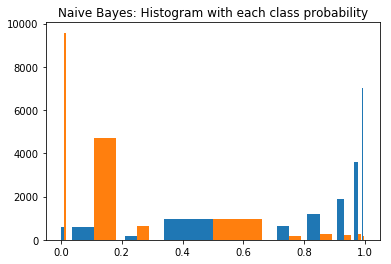

In [39]:
plt.hist(pro_nb, bins=[0.,0.0001,0.02  ,0.2, 0.3, 0.7 , 0.8 , 0.9 , 0.96,0.99,0.998, 1.  ])  # arguments are passed to np.histogram
plt.title("Naive Bayes: Histogram with each class probability")
plt.show()

In [0]:
#probability of class 1
pro_nb_1=[]
for i in pro_nb:
    pro_nb_1.append(i[0])

In [41]:
hist_nb_1=np.histogram(pro_nb_1, bins =[0.,0.0001,0.02  ,0.2, 0.3, 0.7 , 0.8 , 0.9 , 0.96,0.99,0.998, 1.  ])
hist_nb_1

(array([1752,  611,  606,  185,  971,  619, 1210, 1869, 3622, 7016,  559]),
 array([0.00e+00, 1.00e-04, 2.00e-02, 2.00e-01, 3.00e-01, 7.00e-01,
        8.00e-01, 9.00e-01, 9.60e-01, 9.90e-01, 9.98e-01, 1.00e+00]))

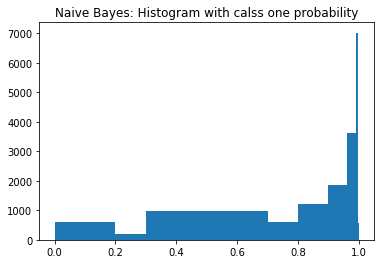

In [42]:
plt.hist(pro_nb_1, bins=[0.,0.0001,0.02  ,0.2, 0.3, 0.7 , 0.8 , 0.9 , 0.96,0.99,0.998, 1.  ])
plt.title("Naive Bayes: Histogram with calss one probability")
plt.show()

In [43]:
#calculate the number of class1 and class2 after binning
class_nb_1=0
for i in pro_nb_1:
  if i>0.5:
    class_nb_1=class_nb_1+1

print("---class distribution after NBE disllation---")
print('class 1: ',class_nb_1)
class_nb_2=len(pro_nb_1)-class_nb_1
print('class_2: ',class_nb_2)

---class distribution after NBE disllation---
class 1:  15493
class_2:  3527


In [44]:
#new dataset
new_nb_y=[]
new_nb_X=X
for i in pro_nb:
    for j in range(11): 
        if not j==10:
            if i[0]>hist_nb_1[1][j] and i[0]<=hist_nb_1[1][j+1]: #i[0]=class 1 pro  hist[1]_1=class 1 bin edge
                class_nb_value=j+1  
                #print(class_value)
                new_nb_y.append(class_nb_value)
new_nb_y=np.array(new_y)
new_nb_y

array([10,  7,  7, ...,  1,  1,  1])

In [45]:
print(new_nb_X.shape)
print(new_nb_y.shape)

(19020, 10)
(19020,)


In [46]:
# Descision Tree, with Naive Bayes Estimation distillation
#split data into 70% training and 30% testing set
X_nb_new_train, X_nb_new_test, y_nb_new_train, y_nb_new_test = train_test_split( new_nb_X, new_nb_y, test_size = 0.3, random_state = 100)

#create a svm classifer 
start_nb_distill=time.clock()
clf_nb_dt=DecisionTreeClassifier()
#Train the model using the training sets
clf_nb_dt.fit(X_nb_new_train, y_nb_new_train)
#Predicting for test dataset
y_pred_nb_distill = clf_nb.predict(X_nb_new_test)
end_nb_distill=time.clock()
print('---Descision Tree, with Naive Bayes Estimation distillation-----')
print('time: ',end_nb_distill-start_nb_distill)
#Evaluating
print("Accuracy: ",metrics.accuracy_score(y_nb_new_test, y_pred_nb_distill))
print('cv_score: ',cross_val_score(clf_nb, X_nb_new_train, y_nb_new_train, cv=5).mean())

---Descision Tree, with Naive Bayes Estimation distillation-----
time:  0.28358300000002146
Accuracy:  0.07273045916579039
cv_score:  0.5627813516109375
